<a href="https://colab.research.google.com/github/molabokchi/bokchi_open_lab/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 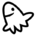 deepdriver quickstart!

welecome to deepdriver! 😀

You can refer to the guide document.
https://bokchi.gitbook.io/deepdriver-ce/

# 0. 💻 install deepdriver & requirement package for train

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached protobuf-3.19.6-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.0
    Uninstalling protobuf-3.20.0:
      Successfully uninstalled protobuf-3.20.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-tools 1.51.1 requires protobuf<5.0dev,>=4.21.6, but you have protobuf 3.19.6 which is incompatible.


In [ ]:
pip install deepdriver==0.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached protobuf-4.21.12-cp37-abi3-manylinux2014_x86_64.whl (409 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.12 which is incompatible.
tensorflow-metadata 1.12.0 requires protobuf<4,>=3.13, but you have protobuf 4.21.12 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.12 which is incompatible.


In [ ]:
pip install protobuf==3.20.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached protobuf-3.20.0-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.12
    Uninstalling protobuf-4.21.12:
      Successfully uninstalled protobuf-4.21.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
grpcio-tools 1.51.1 requires protobuf<5.0dev,>=4.21.6, but you have protobuf 3.20.0 which is incompatible.
googleapis-common-protos 1.57.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.2

#1. ➕ import deepdriver & deeplearnig framework



In [ ]:
import tensorflow as tf

In [ ]:
import deepdriver

#2. prepare dataset

In [ ]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2022-12-19 06:00:14--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   196MB/s    in 0.3s    

2022-12-19 06:00:15 (196 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile
import shutil

train_dir = '/content/cat_dog/'
if os.path.isdir(train_dir):
  shutil.rmtree(train_dir)
  os.mkdir(train_dir)
else:
  os.mkdir(train_dir)

model_dir = '/content/model'

if os.path.isdir(model_dir):
  shutil.rmtree(model_dir)
  os.mkdir(model_dir)
else:
  os.mkdir(model_dir)
local_zip = '/tmp/cats_and_dogs_filtered.zip'
data_dir ='/tmp/cats_and_dogs_filtered/train'
data_doc_dir='/tmp/cats_and_dogs_filtered/train/dogs'
data_cat_dir='/tmp/cats_and_dogs_filtered/train/cats'
valid_dir ='/tmp/cats_and_dogs_filtered/validation'
data_dog_valid_dir='/tmp/cats_and_dogs_filtered/validation/dogs'
data_cat_valid_dir='/tmp/cats_and_dogs_filtered/validation/cats'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# train용 폴더 생성
train_set_dir = os.path.join(train_dir, 'train_set')
os.mkdir(train_set_dir)
train_dog_dir = os.path.join(train_set_dir, 'dog')
os.mkdir(train_dog_dir)
train_cat_dir = os.path.join(train_set_dir, 'cat')
os.mkdir(train_cat_dir)
# valid용 폴더 생성
valid_set_dir = os.path.join(train_dir, 'valid_set')
os.mkdir(valid_set_dir)
valid_dog_dir = os.path.join(valid_set_dir, 'dog')
os.mkdir(valid_dog_dir)
valid_cat_dir = os.path.join(valid_set_dir, 'cat')
os.mkdir(valid_cat_dir)
# test용 폴더 생성
test_set_dir = os.path.join(train_dir, 'test_set')
os.mkdir(test_set_dir)
test_dog_dir = os.path.join(test_set_dir, 'dog')
os.mkdir(test_dog_dir)
test_cat_dir = os.path.join(test_set_dir, 'cat')
os.mkdir(test_cat_dir)

In [ ]:
# image file name list 생성
import shutil
total_data_count =1000
train_data_count =int(total_data_count*0.8)
test_data_count = int(total_data_count*0.1)
valid_data_count =total_data_count - train_data_count -test_data_count
dog_files = [f'dog.{i}.jpg' for i in range(total_data_count)]
cat_files = [f'cat.{i}.jpg' for i in range(total_data_count)]

 
# 각 폴더로 image 이동
for file in dog_files[:train_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(train_dog_dir, file)
    shutil.move(src, dst)
    
for file in dog_files[train_data_count:train_data_count+test_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(valid_dog_dir, file)
    shutil.move(src, dst)
 
for file in dog_files[train_data_count+test_data_count:total_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(test_dog_dir, file)
    shutil.move(src, dst)
 
for file in cat_files[:train_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(train_cat_dir, file)
    shutil.move(src, dst)
    
for file in cat_files[train_data_count:train_data_count+test_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(valid_cat_dir, file)
    shutil.move(src, dst)
 
for file in cat_files[train_data_count+test_data_count:total_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(test_cat_dir, file)
    shutil.move(src, dst)

In [ ]:
train_cat_fnames = os.listdir( train_cat_dir )
train_dog_fnames = os.listdir( train_dog_dir )

In [ ]:
print('Total training cat images :', len(os.listdir(train_cat_dir)))
print('Total training dog images :', len(os.listdir(train_dog_dir)))

print('Total validation cat images :', len(os.listdir(valid_cat_dir)))
print('Total validation dog images :', len(os.listdir(valid_dog_dir)))


print('Total test cat images :', len(os.listdir(test_cat_dir)))
print('Total test dog images :', len(os.listdir(test_dog_dir)))

Total training cat images : 800
Total training dog images : 800
Total validation cat images : 100
Total validation dog images : 100
Total test cat images : 100
Total test dog images : 100


#2. ⚙ deepdriver server setting

In [ ]:
deepdriver.setting(http_host="quick-experience.bokchi.com:9011" ,grpc_host="quick-experience.bokchi.com:19051")

#3. 🔌 log in to deepdriver

In [ ]:
deepdriver.login(key="OWFkMmQyMjA1N2UyM2ViZjBiZmYxNjQ3ODQ5ZDAxYmRlNTBhMmFiZWJhZDAxNTQ5M2MyMDc0ZWJhNGY3NWI1ZQ==")

True

#4. 🥼 create experiment and run

In [ ]:
experiment_name="exp_cat_dog_cnn_epoch_10"

In [ ]:
artifact_name ="cat_dog_cnn_model"

In [ ]:
# experiment init & config hyperparam
deepdriver.init(exp_name= experiment_name, 
                config={ 'architecture':"CNN", 'epoch': 10, 'batch_size': 128, 'hidden_layer':512, 'learning_rate': 0.001})

2022-12-19 06:00:18,688 INFO [deepdriver] [experiment.py:21] - DeepDriver initialized
Team Name=molamola.babo
Exp Name=exp_cat_dog_cnn
Run Name=run-15
Run URL=http://quick-experience.bokchi.com:9111/experi/molamola.babo/exp_cat_dog_cnn/run-15/run/chart


INFO:deepdriver:DeepDriver initialized
Team Name=molamola.babo
Exp Name=exp_cat_dog_cnn
Run Name=run-15
Run URL=http://quick-experience.bokchi.com:9111/experi/molamola.babo/exp_cat_dog_cnn/run-15/run/chart


#5. 📚 train your code and send log

make model

In [ ]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(deepdriver.config.hidden_layer, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=deepdriver.config.learning_rate),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


data load

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
valid_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_set_dir,
                                                  batch_size=deepdriver.config.batch_size,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  valid_datagen.flow_from_directory(valid_set_dir,
                                                       batch_size=deepdriver.config.batch_size,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

test_generator =  test_datagen.flow_from_directory(test_set_dir,
                                                       batch_size=deepdriver.config.batch_size,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


add deepdriver.log() in train function

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):

    # def on_train_end(self, logs=None):
    #     keys = list(logs.keys())
    #     deepdriver.finish()

    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        deepdriver.log({"acc": logs["accuracy"], "loss": logs["loss"], "val_acc": logs["val_accuracy"], "val_loss": logs["val_loss"]})
        #deepdriver.log(logs)


train model

In [ ]:
steps_per_epoch = train_generator.n//deepdriver.config.batch_size

In [ ]:
validation_steps = validation_generator.n//deepdriver.config.batch_size

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=deepdriver.config.epoch,
                    validation_steps=validation_steps ,
                    callbacks=[CustomCallback()],
                    verbose=2)

Epoch 1/10
12/12 - 13s - loss: 1.9256 - accuracy: 0.4789 - val_loss: 0.6848 - val_accuracy: 0.6250 - 13s/epoch - 1s/step
Epoch 2/10
12/12 - 5s - loss: 0.6847 - accuracy: 0.5740 - val_loss: 0.6733 - val_accuracy: 0.6641 - 5s/epoch - 405ms/step
Epoch 3/10
12/12 - 5s - loss: 0.6725 - accuracy: 0.6352 - val_loss: 0.6542 - val_accuracy: 0.5938 - 5s/epoch - 412ms/step
Epoch 4/10
12/12 - 5s - loss: 0.6441 - accuracy: 0.6291 - val_loss: 0.6482 - val_accuracy: 0.5625 - 5s/epoch - 403ms/step
Epoch 5/10
12/12 - 5s - loss: 0.6426 - accuracy: 0.6433 - val_loss: 0.8043 - val_accuracy: 0.5000 - 5s/epoch - 410ms/step
Epoch 6/10
12/12 - 5s - loss: 0.6091 - accuracy: 0.6746 - val_loss: 0.5920 - val_accuracy: 0.7109 - 5s/epoch - 414ms/step
Epoch 7/10
12/12 - 5s - loss: 0.5892 - accuracy: 0.6868 - val_loss: 0.5787 - val_accuracy: 0.7109 - 5s/epoch - 409ms/step
Epoch 8/10
12/12 - 5s - loss: 0.6451 - accuracy: 0.7310 - val_loss: 0.5952 - val_accuracy: 0.6953 - 5s/epoch - 400ms/step
Epoch 9/10
12/12 - 5s - l

In [ ]:
model.save("model_dir/cat_dog_cnn_model")

#6. ⬆ upload artifact(Model)

In [ ]:
arti = deepdriver.Artifacts(name=artifact_name,type="model")

In [ ]:
arti.add("model_dir/cat_dog_cnn_model")

In [ ]:
[(ent.path , ent.digest) for ent in arti.entry_list]

[('variables/variables.data-00000-of-00001',
  '498eda96efce882312909768e94f5dd3'),
 ('variables/variables.index', 'a4bdc3fb5761006d660fc52143c65d5f'),
 ('saved_model.pb', '3ca167fe68aef456c76f793f4d060be3'),
 ('keras_metadata.pb', '94b06d50c269f2b1d26984b692b749ab')]

In [ ]:
arti.upload()

Uploading: [./model_dir/cat_dog_cnn_model/keras_metadata.pb] |██████████████████████████████| [100.0%] [4/4]

True

In [ ]:
deepdriver.finish()

True

#7. ⬇ create another run & download artifact(Model)

In [ ]:
# experiment init & config hyperparam
deepdriver.init(exp_name= experiment_name, 
                config={ 'architecture':"CNN", 'epoch': 10, 'batch_size': 128, 'hidden_layer':512, 'learning_rate': 0.001})

2022-12-19 06:01:49,116 INFO [deepdriver] [experiment.py:21] - DeepDriver initialized
Team Name=molamola.babo
Exp Name=exp_cat_dog_cnn
Run Name=run-16
Run URL=http://quick-experience.bokchi.com:9111/experi/molamola.babo/exp_cat_dog_cnn/run-16/run/chart


INFO:deepdriver:DeepDriver initialized
Team Name=molamola.babo
Exp Name=exp_cat_dog_cnn
Run Name=run-16
Run URL=http://quick-experience.bokchi.com:9111/experi/molamola.babo/exp_cat_dog_cnn/run-16/run/chart


In [ ]:
arti2 = deepdriver.get_artifact(name=artifact_name,type="model")

2022-12-19 06:01:49,815 INFO [deepdriver] [run.py:38] - artifact is got! 
 artifact id :{8}


INFO:deepdriver:artifact is got! 
 artifact id :{8}


In [ ]:
[(ent.path , ent.digest) for ent in arti2.entry_list]

[('keras_metadata.pb', '985484daf6bc6cff85115bada5ddbff3'),
 ('saved_model.pb', 'dd15c4546dbc83a985876e06612c5560'),
 ('variables/variables.data-00000-of-00001',
  '3e787ff5195ad14604b737f6329ef27c'),
 ('variables/variables.index', 'c04d53b55b3694bb0657c2aba6fbf642')]

In [ ]:
arti2.download()

Downloading: [./deepdriver/artifact/8/V3/variables/variables.index] |██████████████████████████████| [100.0%] [4/4]

'./deepdriver/artifact/8'

#8. model re-train & upload model with another version

In [ ]:
reload_model = tf.keras.models.load_model(arti2.get_download_dir())

In [ ]:
history = reload_model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=deepdriver.config.epoch,
                    validation_steps=validation_steps ,
                    callbacks=[CustomCallback()],
                    verbose=2)

Epoch 1/10
12/12 - 6s - loss: 1.0712 - accuracy: 0.7643 - val_loss: 0.5967 - val_accuracy: 0.6641 - 6s/epoch - 509ms/step
Epoch 2/10
12/12 - 5s - loss: 0.3766 - accuracy: 0.8390 - val_loss: 0.6321 - val_accuracy: 0.6797 - 5s/epoch - 414ms/step
Epoch 3/10
12/12 - 5s - loss: 0.3649 - accuracy: 0.8404 - val_loss: 0.6339 - val_accuracy: 0.6953 - 5s/epoch - 411ms/step
Epoch 4/10
12/12 - 5s - loss: 0.3217 - accuracy: 0.8614 - val_loss: 0.6545 - val_accuracy: 0.6719 - 5s/epoch - 403ms/step
Epoch 5/10
12/12 - 5s - loss: 0.5938 - accuracy: 0.8261 - val_loss: 0.7254 - val_accuracy: 0.6875 - 5s/epoch - 404ms/step
Epoch 6/10
12/12 - 5s - loss: 0.2305 - accuracy: 0.9178 - val_loss: 0.7775 - val_accuracy: 0.6953 - 5s/epoch - 405ms/step
Epoch 7/10
12/12 - 5s - loss: 0.1894 - accuracy: 0.9348 - val_loss: 1.2847 - val_accuracy: 0.6172 - 5s/epoch - 399ms/step
Epoch 8/10
12/12 - 5s - loss: 0.2414 - accuracy: 0.8952 - val_loss: 0.9591 - val_accuracy: 0.6406 - 5s/epoch - 409ms/step
Epoch 9/10
12/12 - 5s - 

In [ ]:
reload_model.save("model_dir/cat_dog_cnn_model2")

In [ ]:
arti = deepdriver.get_artifact(name=artifact_name,type="model")

2022-12-19 06:02:54,288 INFO [deepdriver] [run.py:38] - artifact is got! 
 artifact id :{8}


INFO:deepdriver:artifact is got! 
 artifact id :{8}


In [ ]:
arti.add("model_dir/cat_dog_cnn_model2")

In [ ]:
[(ent.path ,ent.status, ent.digest) for ent in arti.entry_list]

[('keras_metadata.pb', 'SYNC', 'b937b2fc9fb9447a5a80776331ecd2f7'),
 ('saved_model.pb', 'SYNC', 'a161fc64629e1507e5da4a3db88042af'),
 ('variables/variables.data-00000-of-00001',
  'SYNC',
  '468535912eade4f1c2174457abca0ddc'),
 ('variables/variables.index', 'SYNC', 'd4fb37e5d212aede89fbe64dff7e5d94')]

In [ ]:
arti.upload()

Uploading: [./model_dir/cat_dog_cnn_model2/variables/variables.index] |██████████████████████████████| [100.0%] [4/4]

True

In [ ]:
deepdriver.finish()

True